In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from read_lhe_uproot import *
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )

In [2]:
df = read_lhe_uproot('SM_pp_jj/Events/run_01/unweighted_events.root')
df

['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.Nparticles', 'Event/Event.ProcessID', 'Event/Event.Weight', 'Event/Event.ScalePDF', 'Event/Event.CouplingQED', 'Event/Event.CouplingQCD', 'Event_size', 'Rwgt', 'Rwgt/Rwgt.fUniqueID', 'Rwgt/Rwgt.fBits', 'Rwgt/Rwgt.Weight', 'Rwgt_size', 'Particle', 'Particle/Particle.fUniqueID', 'Particle/Particle.fBits', 'Particle/Particle.PID', 'Particle/Particle.Status', 'Particle/Particle.Mother1', 'Particle/Particle.Mother2', 'Particle/Particle.ColorLine1', 'Particle/Particle.ColorLine2', 'Particle/Particle.Px', 'Particle/Particle.Py', 'Particle/Particle.Pz', 'Particle/Particle.E', 'Particle/Particle.M', 'Particle/Particle.PT', 'Particle/Particle.Eta', 'Particle/Particle.Phi', 'Particle/Particle.Rapidity', 'Particle/Particle.LifeTime', 'Particle/Particle.Spin', 'Particle_size']
Number of events: 10000


,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,-1,-1,-1,503,501,0.000000,0.000000,63.675224,63.675224,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,1
1,21,-1,-1,-1,504,502,-0.000000,-0.000000,-209.247959,209.247959,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,1.0,1
1,21,1,0,1,503,502,-2.361709,-34.029980,-203.153047,205.997033,0.0,34.111834,-2.484438,-1.640086,-2.484438,0.0,1.0,1
1,21,1,0,1,504,501,2.361709,34.029980,57.580312,66.926150,0.0,34.111834,1.294713,1.501507,1.294713,0.0,1.0,1
2,21,-1,-1,-1,501,502,0.000000,0.000000,20.538585,20.538585,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,21,1,0,1,504,502,-17.930325,-12.543404,20.497086,29.982729,0.0,21.882265,0.835897,-2.531160,0.835897,0.0,1.0,9999
10000,2,-1,-1,-1,502,0,-0.000000,0.000000,175.650324,175.650324,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,10000
10000,21,-1,-1,-1,503,502,0.000000,-0.000000,-49.362613,49.362613,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,10000


In [3]:
# Essa parte aqui, nesse caso, não é necessário ser calculado pelo fato de que PT já consta no dataframe.
# Então basicamente eu criei uma variável que não está sendo usada.

df['momento_transverso'] = df.PT
selection = ((df.Status == 1) & (df.PID == 21))
df_sel = df [selection]
df_sel

#pd.set_option('display.max_rows', None) # expandindo para visualização máxima do número de linhas
#df_sel # tabela específica para expandir


,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event,momento_transverso
event,,,,,,,,,,,,,,,,,,,
1,21,1,0,1,503,502,-2.361709,-34.029980,-203.153047,205.997033,0.0,34.111834,-2.484438,-1.640086,-2.484438,0.0,1.0,1,34.111834
1,21,1,0,1,504,501,2.361709,34.029980,57.580312,66.926150,0.0,34.111834,1.294713,1.501507,1.294713,0.0,1.0,1,34.111834
2,21,1,0,1,503,502,-19.787829,16.610267,11.486010,28.273442,0.0,25.835230,0.431109,2.443274,0.431109,0.0,1.0,2,25.835230
3,21,1,0,1,503,502,8.632965,-19.931732,4.239018,22.130778,0.0,21.721005,0.193940,-1.162062,0.193940,0.0,1.0,3,21.721005
3,21,1,0,1,504,501,-8.632965,19.931732,1.136443,21.750714,0.0,21.721005,0.052296,1.979530,0.052296,0.0,1.0,3,21.721005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,21,1,0,1,503,501,32.533056,-13.726920,-52.536277,63.299988,0.0,35.310453,-1.187999,-0.399274,-1.187999,0.0,1.0,9998,35.310453
9998,21,1,0,1,504,503,-32.533056,13.726920,-652.400433,653.355304,0.0,35.310453,-3.610358,2.742319,-3.610358,0.0,-1.0,9998,35.310453
9999,21,1,0,1,503,501,17.930325,12.543404,4.402177,22.320679,0.0,21.882265,0.199843,0.610433,0.199843,0.0,1.0,9999,21.882265


Text(0, 0.5, 'Número de Eventos')

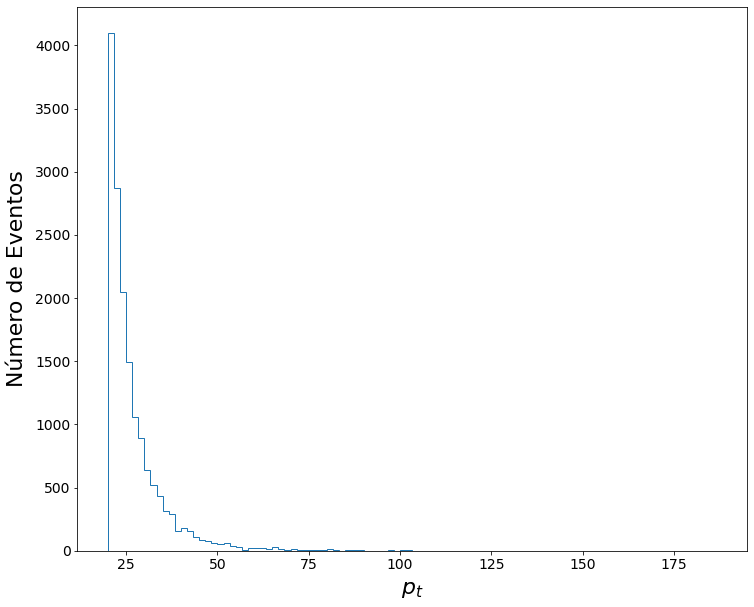

In [4]:
fig = plt.figure (figsize=(12,10))
plt.hist(df_sel['PT'], histtype='step', bins=100)
plt.xlabel('$p_t$')
plt.ylabel('Número de Eventos')

In [5]:
# Normalização

cross_section = 7.0133e+08 # para energia padrão 

n_events = len( df_sel )
print ( n_events )
weights = np.ones( n_events )
weights

15897


array([1., 1., 1., ..., 1., 1., 1.])

2.0
[0.5 0.5 0.5 ... 0.5 0.5 0.5]


Text(0, 0.5, '$\\frac{\\Delta \\sigma_i}{\\Delta(pt)} \\approx \\frac{d\\sigma}{dpt} \\,(\\rm{pb})$')

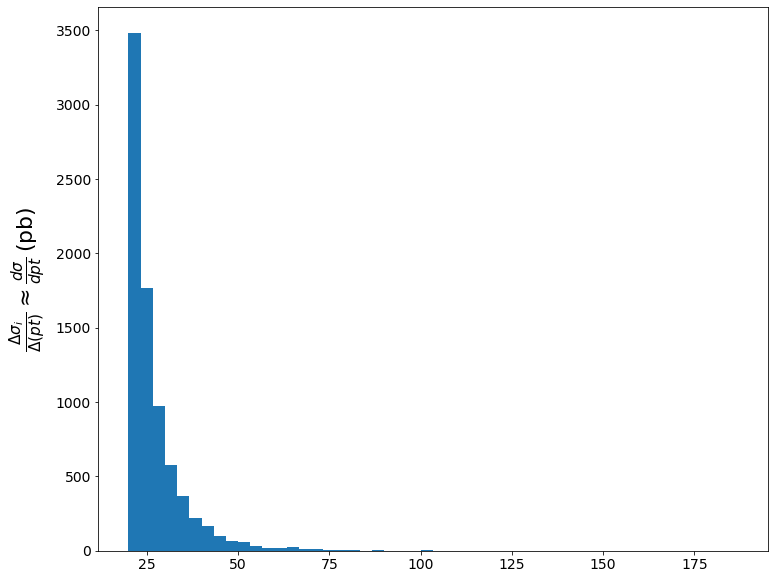

In [6]:
bins = 100

delta_pt = ( 200./ bins ) # 200 é o tamanho do meu histograma
print ( delta_pt )

weights_binwidth = weights / delta_pt
print ( weights_binwidth )

fig = plt.figure( figsize=(12,10) )

# Em df_sel['PT'] poderia entrar aquela variável que eu fiz e acabei por não utilizar, visto que PT já consta no
# dataframe
plt.hist( df_sel['PT'], weights=weights_binwidth, bins=50)
plt.ylabel(r"$\frac{\Delta \sigma_i}{\Delta(pt)} \approx \frac{d\sigma}{dpt} \,(\rm{pb})$" )